# Assignment 1: Single Qubit Circuits and Measurement Principle

The purpose of this assignment is to make sure that everyone is comfortable with the concepts of quantum computing using single qubit systems - single qubit gates. Measurement principle will also be ellucidated in this assignment. This assignment was created keeping in mind what has been/is being covered in Dr. Farias' lecture and I believe successful completion of this assignment would be a key indicator that one understands all the required concepts.


## Learning Module: Various Single Qubit Gates, Measurement and Conditionals in Qiskit

In this section we will go over the following operations that are available in Qiskit.These are:
- Single-qubit quantum gates
- Measurements
- Reset
- Conditionals

We will also show you how to use the three different simulators. Simulators - as the name suggests - are just backend libraries that are running all the *math* of QIC locally on y'alls machine.
- unitary_simulator
- qasm_simulator

In [1]:
# Useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_histogram
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

## Recap of Single Qubit Quantum states <a name="single_states"/>

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note, due to the conservation of probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates <a name="single_gates"/>

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

**Explain Quantum Register**

In [3]:
q = QuantumRegister(1)
q

QuantumRegister(1, 'q0')

### u gates

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


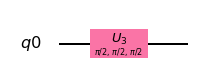

In [4]:
qc = QuantumCircuit(q)
qc.u3(pi/2,pi/2,pi/2,q)
qc.draw('mpl')

In [5]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ gate has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions.

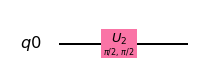

In [6]:
qc = QuantumCircuit(q)
qc.u2(pi/2,pi/2,q)
qc.draw('mpl')

In [7]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

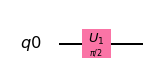

In [8]:
qc = QuantumCircuit(q)
qc.u1(pi/2,q)
qc.draw('mpl')

In [9]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

### Identity gate

The identity gate is $Id = u0(1)$.

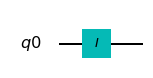

In [10]:
qc = QuantumCircuit(q)
qc.id(q)
qc.draw('mpl')

In [11]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

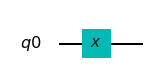

In [12]:
qc = QuantumCircuit(q)
qc.x(q)
qc.draw('mpl')

In [13]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j],
       [1.+0.j, 0.+0.j]])

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

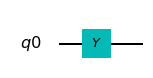

In [14]:
qc = QuantumCircuit(q)
qc.y(q)
qc.draw('mpl')

In [15]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

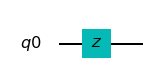

In [16]:
qc = QuantumCircuit(q)
qc.z(q)
qc.draw('mpl')

In [17]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

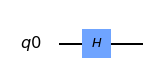

In [18]:
qc = QuantumCircuit(q)
qc.h(q)
qc.draw('mpl')

In [19]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

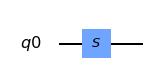

In [20]:
qc = QuantumCircuit(q)
qc.s(q)
qc.draw('mpl')

In [21]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


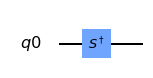

In [22]:
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw('mpl')

In [23]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

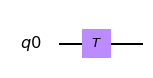

In [24]:
qc = QuantumCircuit(q)
qc.t(q)
qc.draw('mpl')

In [25]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-pi/4)
$$

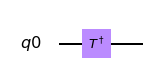

In [26]:
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw('mpl')

In [27]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707-0.707j]])

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

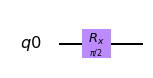

In [28]:
qc = QuantumCircuit(q)
qc.rx(pi/2,q)
qc.draw('mpl')

In [29]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   -0.707j,  0.707+0.j   ]])

#### Rotation around Y-axis

$$
R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} =u3(\theta,0,0)
$$

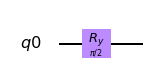

In [30]:
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw('mpl')

In [31]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note that here we have used an equivalent as it is different to u1 by a global phase $e^{-i \phi/2}$.

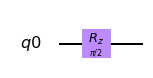

In [32]:
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw('mpl')

In [33]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

## Non-unitary operations <a name="non_unitary"/>

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

In [34]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### Measurements

We don't have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

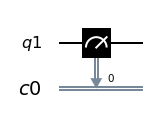

In [35]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw('mpl')

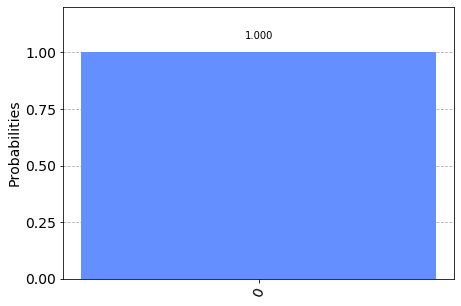

In [36]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

 The simulator predicts that 100 percent of the time the classical register returns 0. 

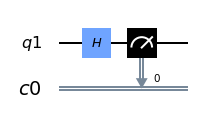

In [37]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')

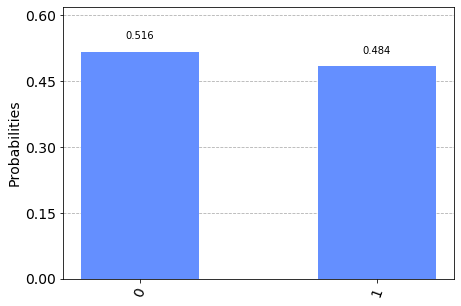

In [38]:
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

 The simulator predicts that roughly 50 percent of the time the classical register returns 0 or 1. 

### Reset
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

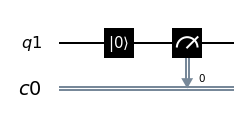

In [39]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

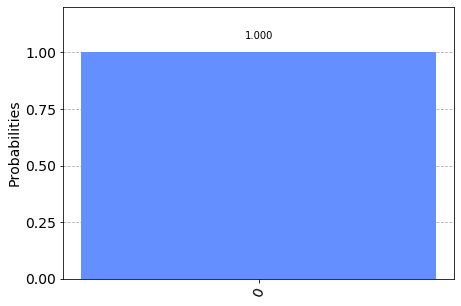

In [40]:
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

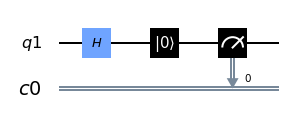

In [41]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

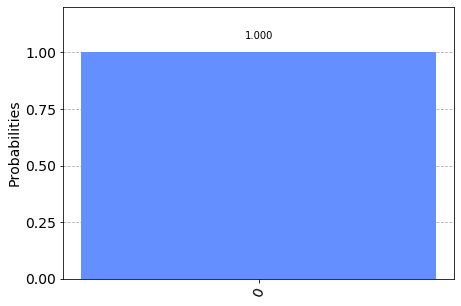

In [42]:
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

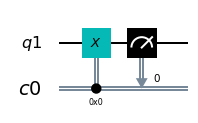

In [43]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

Here the classical bit always takes the value 0 so the qubit state is always flipped. 

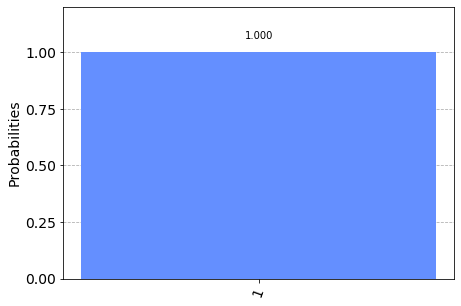

In [44]:
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

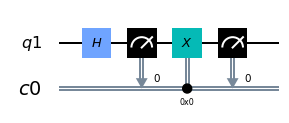

In [45]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw('mpl')

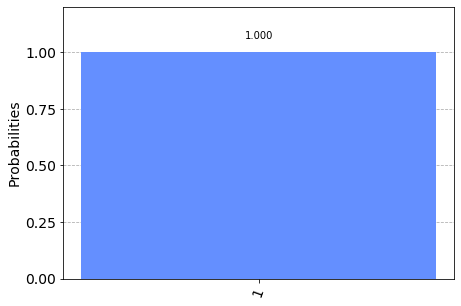

In [46]:
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $\left|1\right\rangle$.

In Summary, the following diagram shows how some popular single gates affects a single qubit state:

![fig_gates](gates-and-qspheres.png)

### Data Visualization in Qiskit 

The following example shows the various data visualization packages in qiskit.

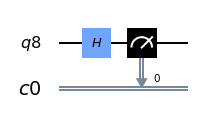

In [65]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

q = QuantumRegister(1)

qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')


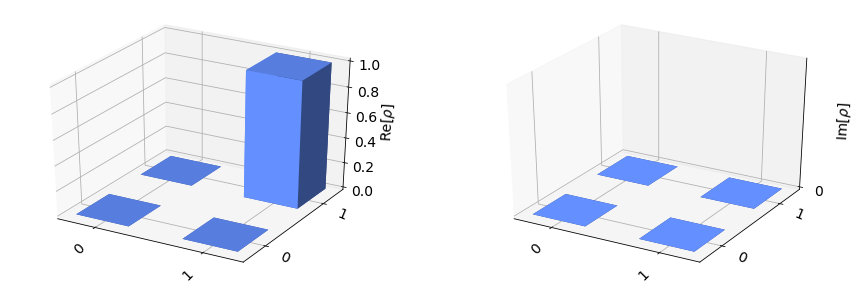

In [48]:
# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
measured  = result.get_statevector(qc)
plot_state_city(measured)

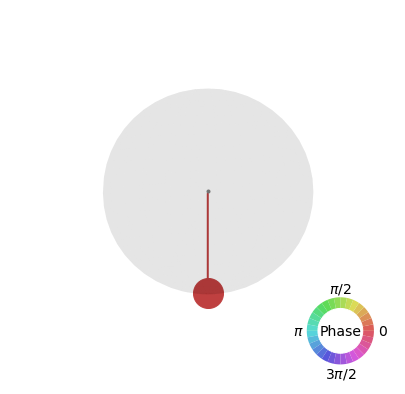

In [49]:
plot_state_qsphere(measured)

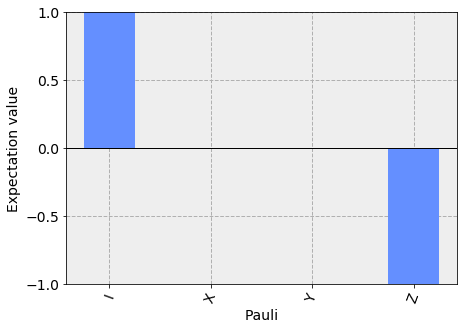

In [50]:
plot_state_paulivec(measured)

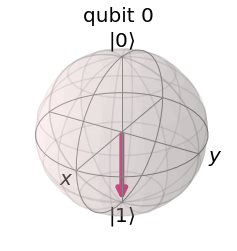

In [51]:
plot_bloch_multivector(measured)

# Assignment 1

### Problem 1.1

**What is the output of the following circuit given initial state of $| 0 \rangle$ ?**

<img src="hx0.png" align = "left" width="200"/>


**1)** $| 0 \rangle$

**2)** $\frac{| 0 \rangle + | 1 \rangle}{\sqrt{2}}$

**3)** $\frac{| 0 \rangle - | 1 \rangle}{\sqrt{2}}$

**4)** Both 2 & 3 are possible

**5)** None of the above

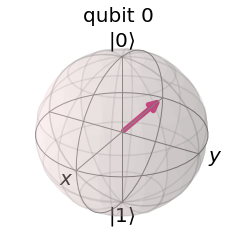

In [6]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from math import pi
from qiskit import *

qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw("mpl")

backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
measured  = result.get_statevector(qc)
plot_state_city(measured)
plot_bloch_multivector(measured)










#implement the circuit and complete the next cell

**(Double Click to Edit This Block)**

The answer to 1.1 is 3, for Hadamard gate on ${|1 \rangle.}$

### Problem 1.2

Show by implementing the necessary circuits that a bit-flip operation, preceded and followed by Hadamard transforms, equals a
phase-flip operation: i.e. $HXH = Z$

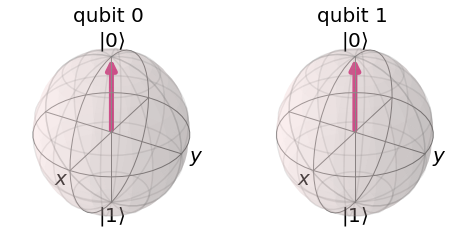

In [36]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from math import pi
from qiskit import *

qc = QuantumCircuit(2)
qc.h(0)
qc.x(0)
qc.h(0)
qc.z(1)
qc.draw("mpl")

backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(qc, backend).result()
measured  = result.get_statevector(qc)
plot_state_city(measured)
plot_bloch_multivector(measured)

### Problem 1.3

For the circuit shown below. Without writing code and using the learning module predict what the measured qubit state(s) would be? What would their probabilities be? Once you have written your answer implement the circuit and verify your answer by making the histogram plot of the output measured state.


[circuit2](circuit1.png)

**Hint:** All qubits in qiskit and also in this circuit start in the $| 0 \rangle$ state. Think about the effect of two $H$ gates for the $| 0 \rangle$ state. 

1) Multiple Hadamard gates is equal to an I gate, so the measurement will be of $|0\rangle$, producing a probability of 1 that it is measured 0.

2) An X gate would flip the state of the qubit, making the measurement apply on $|1 \rangle$.

3) The measurement would be 0 since no action is taken.


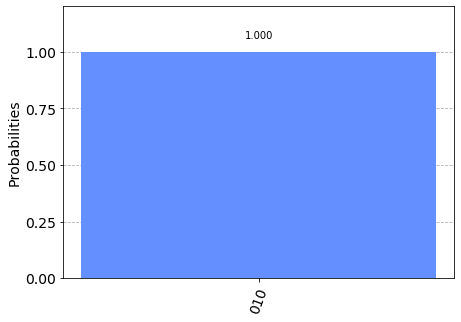

In [33]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere, plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import plot_histogram
from qiskit import BasicAer

q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

qc.h(q[0])
qc.h(q[0])
qc.x(q[1])
qc.measure(q, c)
qc.draw('mpl')


backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
counts = job.result().get_counts(qc)
plot_histogram(counts)